In [2]:
# This notebook is the continuation of the jupyter notebook "web scraping" for PTT. Now that we have all the text
# converted into a excel file, we want to clean the data so that it is sutible for analysis. 
# 這本是上一本的延續，從用beautifulSoup 得到的PTT 資料，我們的目的現在是要將那些資料分解，然後做分析。
# 我們會用‘結巴’來做分解

# Import libraries
import jieba
import pandas as pd

In [3]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tiger\AppData\Local\Temp\jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [4]:
# now lets import our dataframe
# import 我們的數據

df = pd.read_excel(r"C:\Users\tiger\Desktop\jupyter notebook works\ptt\ptt.xlsx.xlsx")

In [5]:
# 我們只需要最後一排

x = df.iloc[:, -1].values

In [6]:
# 用 regular expression 來吧標點符號給去掉
import string
import re

context = []
for i in  x:
    i = re.sub("[a-z]+","",i) # removes any english
    i = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",i) #removes chinese punctuation
    i = re.sub("[【】╮╯▽╰╭★→「」]+","",i)  #removes chinese punctuation
    i = re.sub("！，❤。～《》：（）【】「」？”“；：、","",i)  #removes chinese punctuation
    i = re.sub(r'[^\w\s]','',i)   # removes english punctuation
    if i != '':
        context.append(i)
        

In [7]:
context

['作者哥看板標題爆卦金色力量開始收黨費了時間引述哥之銘言引述之銘言剛剛收電子郵件發現當初填入黨申請書現在要收黨費了一年六百元左右然後金色力量網站還有賣情趣用品政黨商品吊牌悠遊卡套黨證只能說恥力要夠不然不敢戴身上童家拳前幾天想起來自己好像是創始黨員想說自己的悠遊卡最近快讀取不到其他選項的餐會帽子和潮之類沒興趣就只繳基本黨費然後隔天黨主席阿童金色狂風就私訊我仔細想想好久沒拍照了也沒照片用然後不放張圖片什麼的有點可惜最後朋友圈問一問放什麼比較有趣最後選出來這張想說這樣應該不會過吧貼給阿童嗯好哦所以我的黨證上面有爆射圖了置是手機選字多打的請忽略想說怎麼到現在都還沒拿到黨證結果昨天收到阿童的簡訊一下班我就馬上直奔金力黨部沒想到才點幾分黨部大門已經關了好吧至少我們很遵守勞基法不會隨便讓黨工加班然後在今天一波三折後還是成功拿到黨證了打黨部電話是阿童親自接進去還是阿童親自拿給我的不知道該說金色力量很窮還是很省經費寄信的包裝還是用銀行送的紅包袋繳基本黨費給的黨證悠遊卡證件帶意外的大爆射圖完美融合在黨證裡想加入的朋友歡迎參加喔哥的是什麼意思其實我自己也忘了發信站批踢踢實業坊來自臺灣文章網址推真的是很用心呢那是噴射的表情對啊我自己選的圖意外的很適合推笑死圖很合推有沒有被阿童的鐵拳伺候稍微聊一下我就趕著回去了所以沒和他切磋那是吧推笑死推潮到射精了推笑死各種性暗示推有點阿黑顏的感覺推噴射圖笑死推黨主席還兼任黨工哦辦公室沒有其他人嗎除了他就只有一個女的不知道是誰推超讚推量力色金編輯臺灣推我要入黨推射精力量推快去拉雞排妹入黨好屌正港色金阿抱歉是金色力量靠杯大爆射推笑死推推噴射圖為什麼這麼合推推量力色金推射爆圖',
 '真的是很用心呢',
 '那是噴射的表情ㄇ',
 '笑死圖很合',
 '有沒有被阿童的鐵拳伺候',
 '那是GG吧',
 '笑死',
 '潮到射精了',
 '笑死',
 '各種性暗示',
 '有點阿黑顏的感覺',
 '噴射圖笑死',
 '黨主席還兼任黨工哦辦公室沒有其他人嗎',
 '超讚XDDDD',
 '量力色金',
 'XDDDDDDD我要入黨',
 '射精力量',
 '快去拉雞排妹入黨',
 '好屌正港色金阿抱歉是金色力量',
 '靠杯大爆射',
 '笑死',
 '噴射圖為什麼這麼合',
 '量力色金',
 '射爆圖XD',
 '作者小泉看板標題問卦鐵路高架的好處是啥時間三個

In [26]:
# 用結巴來做 NLP

lst = []
for i in context:
    seg_list = jieba.cut_for_search(i) 
    lst.append(list(seg_list))

In [27]:
lst

[['作者',
  '哥',
  '看板',
  '標題',
  '爆卦',
  '金色',
  '力量',
  '開始',
  '收黨費',
  '了',
  '時間',
  '引述',
  '哥之銘言',
  '引述',
  '之銘言',
  '剛剛',
  '收電子',
  '郵件',
  '發現',
  '當初',
  '填入',
  '黨',
  '申請',
  '書現',
  '在',
  '要',
  '收黨費',
  '了',
  '一年',
  '六百',
  '百元',
  '六百元',
  '左右',
  '然',
  '後',
  '金色',
  '力量',
  '網站',
  '還有',
  '賣',
  '情趣',
  '用品',
  '情趣用品',
  '政黨',
  '商品',
  '吊牌',
  '悠遊',
  '卡套',
  '黨證',
  '只能',
  '說恥力',
  '要夠',
  '不然',
  '不敢',
  '戴',
  '身上',
  '童家',
  '拳前',
  '幾天',
  '想起',
  '來',
  '自己',
  '好像',
  '是',
  '創始',
  '黨員想',
  '說',
  '自己',
  '的',
  '悠遊卡',
  '最近',
  '快',
  '讀取',
  '不到',
  '其他',
  '選項',
  '的',
  '餐會',
  '帽子',
  '和',
  '潮之類',
  '沒興趣',
  '就',
  '只繳',
  '基本',
  '黨費然',
  '後',
  '隔天',
  '黨',
  '主席',
  '阿童',
  '金色',
  '狂風',
  '就',
  '私訊',
  '我',
  '仔細',
  '想想',
  '好久',
  '沒',
  '拍照',
  '了',
  '也',
  '沒',
  '照片',
  '用然',
  '後',
  '不放',
  '不放張',
  '圖片',
  '什麼',
  '的',
  '有點',
  '可惜',
  '最',
  '後',
  '朋友',
  '朋友圈',
  '問一問',
  '放什麼',
  '比',
  '較',
  '有趣',
  '最後選',
  '出來',
  '這張',
  '想

In [28]:
# 現在的問題在於我們有很多list inside a list. 
# 用兩個loop 把全部的東西放在一個list裏頭

final_lst = []
for i in lst:
    for j in i:
        final_lst.append(j)
        
        

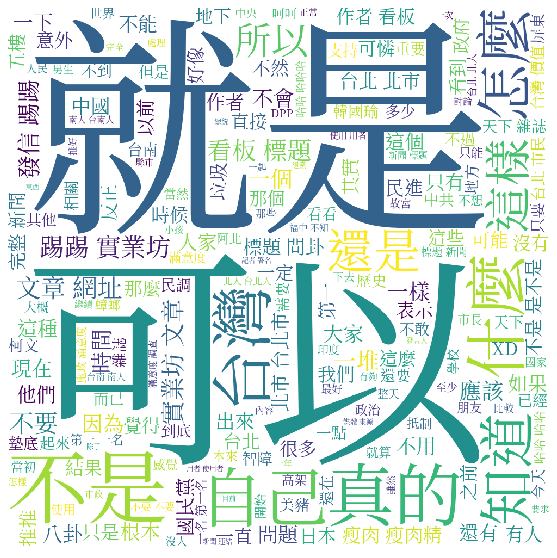

In [30]:
# 最後我們來把這些做成文字雲圖

from wordcloud import WordCloud, STOPWORDS   # 用來做文字雲的library
import matplotlib.pyplot as plt

words = ''
stopwords = set(STOPWORDS)

# Chinese fonts must be set
font_path = (r"C:\Users\tiger\Desktop\jupyter notebook works\ptt\SourceHanSerifTC-Regular.otf")

# 用 for loop to iterate through all text
for i in final_lst:
    words += i + " "
    
wordcloud = WordCloud(font_path=font_path, 
                      width = 1000, 
                      height = 1000, 
                      background_color = 'white', 
                      stopwords = stopwords).generate(words)

# plotting the image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()